In [7]:
import numpy as np
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from matplotlib.animation import FuncAnimation


In [23]:
os.getcwd()

'c:\\Users\\User\\AppData\\Local\\Programs\\Microsoft VS Code'

In [2]:
def speedFoam(R0, u0, h0):
    return 2*np.pi*R0*u0*h0

In [51]:
def heightStart(V, R0, h0, beta, t):
    main = ((27*V**3)/(4*np.pi**3*beta**2*R0**2))**(1/7)
    h0 = (main**(1/7))*t**(1/7)
    return h0

In [52]:
def radiusRes(beta, R0, V, t):
    main = ((18*beta*R0*V**2)/(np.pi**2))**(1/7)
    R = main * t**(3/7)
    return R

In [53]:
V = 0.634  
R0 = 1  
beta = 0.22
t_max = 10.0  
dt = 0.01  
h0 = 0.7

In [54]:
times = np.arange(0, t_max, dt)
heights = np.zeros_like(times)
radii = np.zeros_like(times)

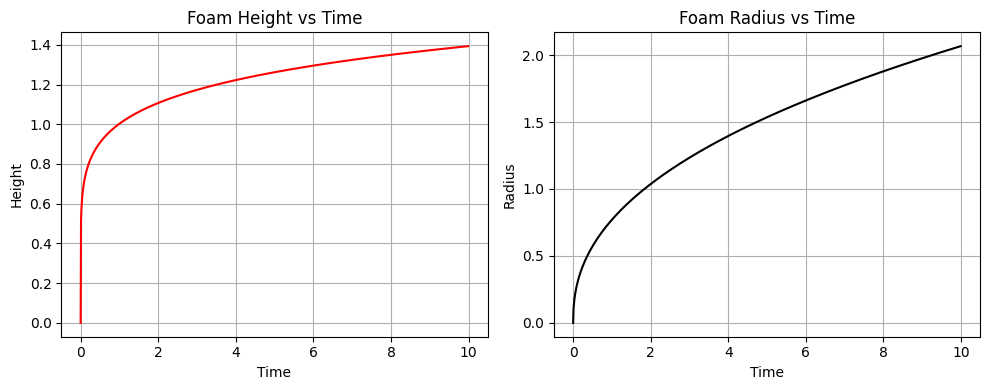

In [61]:
for i, t in enumerate(times):
    heights[i] = heightStart(V, R0, h0, beta, t)
    radii[i] = radiusRes(beta, R0, V, t)

# Create plots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot height vs time
axs[0].plot(times, heights, color = "red")
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Height')
axs[0].set_title('Foam Height vs Time')
axs[0].grid()

# Plot radius vs time
axs[1].plot(times, radii, color = "black")
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Radius')
axs[1].set_title('Foam Radius vs Time')
axs[1].grid()
plt.tight_layout()
plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


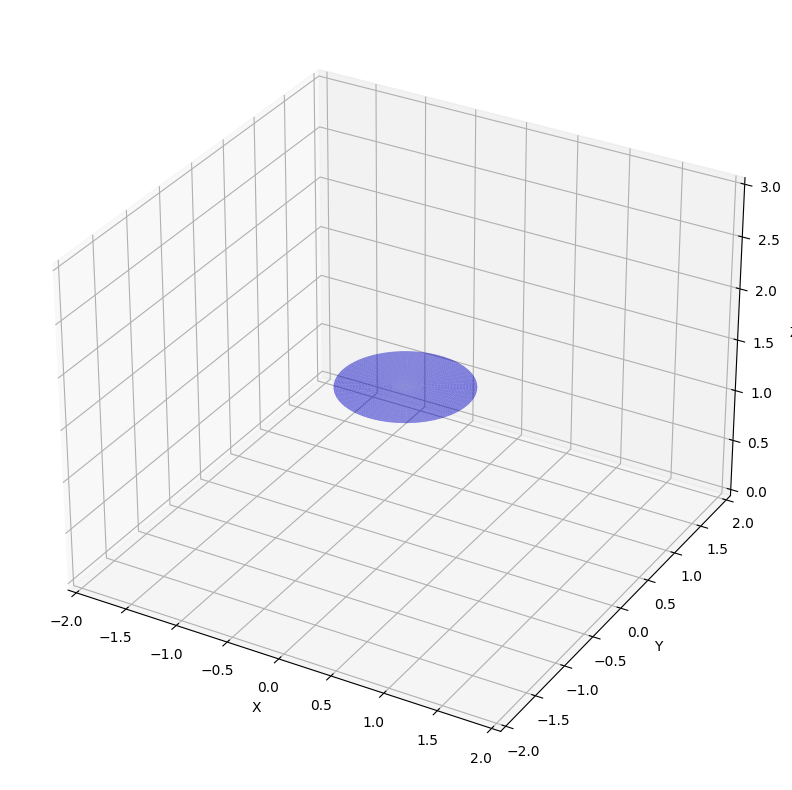

In [8]:
V = 0.777  
R0 = 0.01 
beta = 0.1 

t_range = np.linspace(0, 3, 100)

h0 = np.zeros_like(t_range)
R = np.zeros_like(t_range)
for i, t in enumerate(t_range):
    h0[i] = heightStart(V, R0, 0, 0, beta, t)
    R[i] = radiusRes(beta, R0, V, t)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(0, 3)

def foam_surface(height, radius, N=50):
    theta = np.linspace(0, 2*np.pi, N)
    z = np.zeros((N,))
    r = np.linspace(0, radius, N)
    R, THETA = np.meshgrid(r, theta)
    H = np.ones_like(R) * height
    X = R * np.cos(THETA)
    Y = R * np.sin(THETA)
    return X, Y, H

surf = None

def update_plot(i):
    global surf
    if surf:
        surf.remove()
    surf = ax.plot_surface(*foam_surface(h0[i], R[i]), color='b', alpha=0.66)
    return surf,

anim = FuncAnimation(fig, update_plot, frames=len(t_range), interval=10)
anim.save('foam_animation.gif', writer='imagemagick')
plt.show()
